In [6]:
import os
os.chdir('../')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#from sklearn.metrics import mean_squared_error
from datamodel import Listing, Observation, Order, OrderDepth, ProsperityEncoder, Symbol, Trade, TradingState, ConversionObservation


data_1 = pd.read_csv('data/prices_round_4_day_1.csv', sep =";")
data_2 = pd.read_csv('data/prices_round_4_day_2.csv', sep =";")
data_3 = pd.read_csv('data/prices_round_4_day_3.csv', sep =";")

data=[data_1, data_2, data_3]
data= pd.concat(data)
data.head()

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,1,0,COCONUT,9999.0,200.0,NaN,NaN,NaN,NaN,10001,200,NaN,NaN,NaN,NaN,10000.0,0.0
1,1,0,COCONUT_COUPON,637.0,39.0,NaN,NaN,NaN,NaN,638,39,NaN,NaN,NaN,NaN,637.5,0.0
2,1,100,COCONUT,9999.0,104.0,9998.0,44.0,NaN,NaN,10000,104,10001.0,44.0,NaN,NaN,9999.5,0.0
3,1,100,COCONUT_COUPON,637.0,33.0,NaN,NaN,NaN,NaN,638,33,NaN,NaN,NaN,NaN,637.5,0.0
4,1,200,COCONUT,9998.0,133.0,9997.0,62.0,NaN,NaN,9999,133,10000.0,62.0,NaN,NaN,9998.5,0.0


In [7]:
#create 4 different dataframes from data for each product CHOCOLATE, STRAWBERRY, ROSES, GIFT_BASKET
data_coconut = data[data['product'] == 'COCONUT'].reset_index(drop=True)
data_coupon = data[data['product'] == 'COCONUT_COUPON'].reset_index(drop=True)



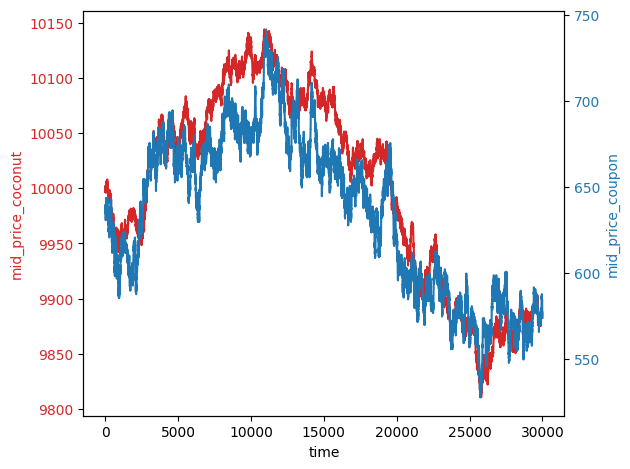

In [8]:
#plot data_coconut['mid_price'] and data_coupon['mid_price'] on the same graph with 2 different y axis
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('mid_price_coconut', color=color)
ax1.plot(data_coconut['mid_price'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('mid_price_coupon', color=color)  # we already handled the x-label with ax1
ax2.plot(data_coupon['mid_price'], color=color)
ax2.tick_params(axis='y', labelcolor=color)


fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


In [9]:
#calculate correlation between data_coconut['mid_price'] and data_coupon['mid_price']
correlation = data_coconut['mid_price'].corr(data_coupon['mid_price'])
print(correlation)

0.9578693347968137


In [10]:
print(data_coconut['mid_price'].mean())
print(data_coupon['mid_price'].mean())

9999.900983333333
635.0464333333333


In [11]:
#calculate the standardizes spread between data_coconut['mid_price'] and data_coupon['mid_price'], calculated over a rolling window of 100 observations
spread = data_coconut['mid_price'] - data_coupon['mid_price']
spread_10 = spread.rolling(window=50).mean()

#standardize spread_10
spread_standardized = (spread - spread.mean()) / spread.std()
spread_10_standardized = (spread_10 - spread_10.mean()) / spread_10.std()



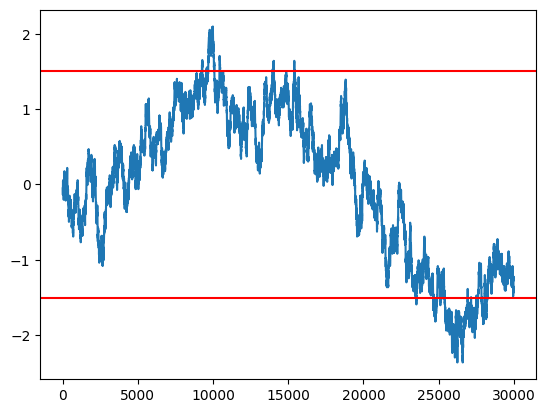

In [12]:
#spread_10_standardized.plot()
spread_standardized.plot()
#horizontal lines at +-1.5
plt.axhline(y=1.5, color='r', linestyle='-')
plt.axhline(y=-1.5, color='r', linestyle='-')


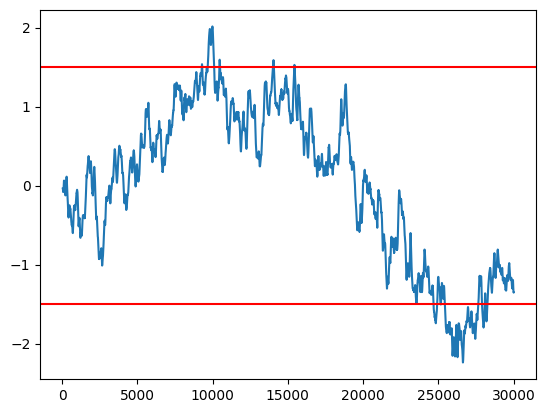

In [13]:
spread_10_standardized.plot()

#horizontal lines at +-1.5
plt.axhline(y=1.5, color='r', linestyle='-')
plt.axhline(y=-1.5, color='r', linestyle='-')

In [14]:
def calculate_rsi(data, window=120):
    delta = data.diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

In [15]:
rsi_coconut = calculate_rsi(data_coconut['mid_price'])
rsi_coupon = calculate_rsi(data_coupon['mid_price'])

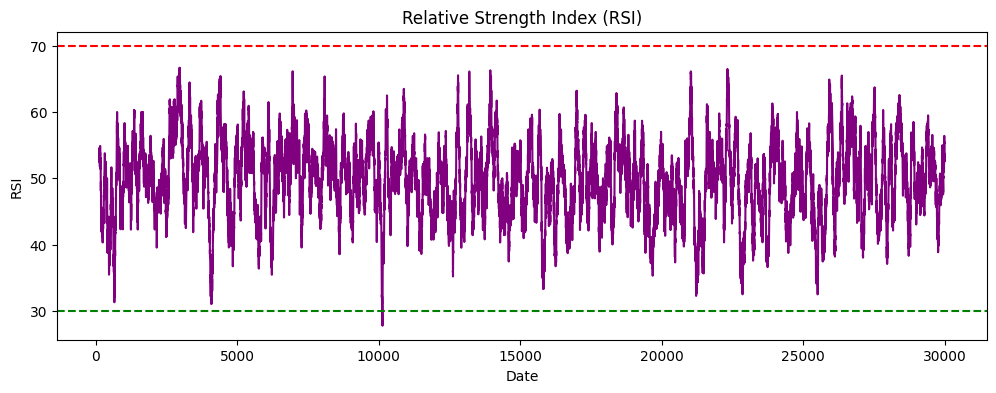

In [16]:
plt.figure(figsize=(12, 4))
rsi_coconut.plot(color='purple')
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.axhline(70, linestyle='--', color='red')  # Overbought threshold
plt.axhline(30, linestyle='--', color='green')  # Oversold threshold
plt.show()

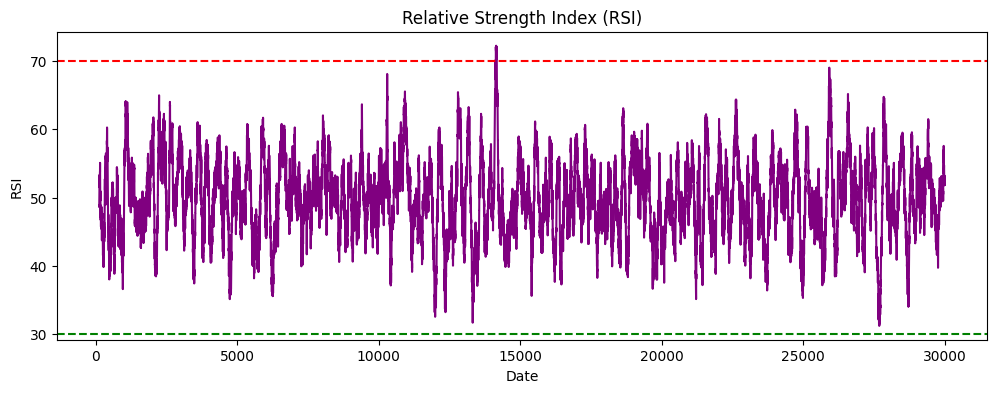

In [17]:
plt.figure(figsize=(12, 4))
rsi_coupon.plot(color='purple')
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.axhline(70, linestyle='--', color='red')  # Overbought threshold
plt.axhline(30, linestyle='--', color='green')  # Oversold threshold
plt.show()

In [18]:
#get the index of the data in coupon where the rsi is below 30
rsi_below_30_coupon = rsi_coupon[rsi_coupon < 30]
below30 = rsi_below_30_coupon.index

rsi_above_70_coupon = rsi_coupon[rsi_coupon > 70]
above70 = rsi_above_70_coupon.index


In [19]:
above70

Index([14125, 14136, 14137, 14138, 14139, 14140, 14141, 14142, 14143, 14144,
       14145, 14146, 14147, 14148, 14149, 14150, 14151, 14152, 14153, 14154,
       14155, 14156, 14157, 14158, 14159, 14160, 14161, 14162, 14163, 14164,
       14165, 14166, 14167, 14168, 14169, 14170, 14171, 14172],
      dtype='int64')

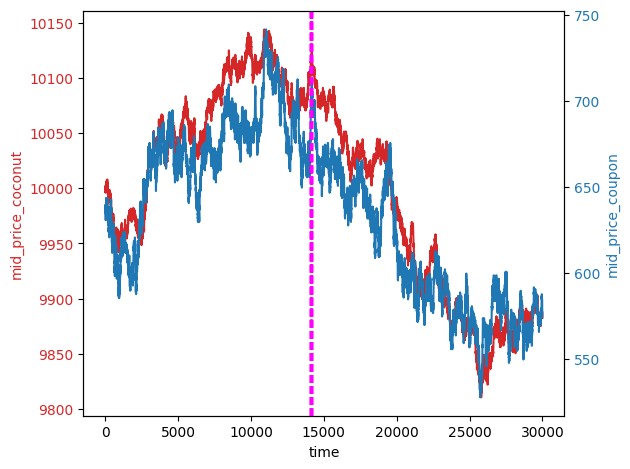

In [20]:
#plot data_coconut['mid_price'] and data_coupon['mid_price'] on the same graph with 2 different y axis
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('mid_price_coconut', color=color)
ax1.plot(data_coconut['mid_price'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('mid_price_coupon', color=color)  # we already handled the x-label with ax1
ax2.plot(data_coupon['mid_price'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

#add vertical line at the indexs in below30 list
for i in below30:
    plt.axvline(x=i, color='green', linestyle='--')

for i in above70:
    plt.axvline(x=i, color='magenta', linestyle='--')


fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

Analyse testing data

In [21]:
#get testing data
data_test = pd.read_csv('data/testing_data.csv', sep =";")
data_test

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,3,0,ORCHIDS,1090,8,1089.0,5.0,1082.0,49.0,1099,8,1100.0,5.0,1108.0,49.0,1094.5,0.00000
1,3,0,CHOCOLATE,7750,136,NaN,NaN,NaN,NaN,7752,136,NaN,NaN,NaN,NaN,7751.0,0.00000
2,3,0,GIFT_BASKET,69548,2,69547.0,15.0,69546.0,21.0,69559,2,69560.0,15.0,69561.0,21.0,69553.5,0.00000
3,3,0,AMETHYSTS,9996,2,9995.0,26.0,NaN,NaN,10004,2,10005.0,26.0,NaN,NaN,10000.0,0.00000
4,3,0,STARFRUIT,5002,1,5001.0,28.0,NaN,NaN,5008,28,NaN,NaN,NaN,NaN,5005.0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,3,99900,STARFRUIT,4977,27,NaN,NaN,NaN,NaN,4983,1,4984.0,26.0,NaN,NaN,4980.0,0.00000
8996,3,99900,GIFT_BASKET,69440,1,69439.0,12.0,69438.0,27.0,69451,1,69452.0,12.0,69453.0,27.0,69445.5,0.00000
8997,3,99900,COCONUT_COUPON,597,40,NaN,NaN,NaN,NaN,598,40,NaN,NaN,NaN,NaN,597.5,-44135.65625
8998,3,99900,ORCHIDS,1051,10,1049.0,2.0,1040.0,48.0,1061,10,1062.0,2.0,1072.0,48.0,1056.0,0.00000


In [22]:
test_coconut = data_test[data_test['product'] == 'COCONUT'].reset_index(drop=True)
test_coupon = data_test[data_test['product'] == 'COCONUT_COUPON'].reset_index(drop=True)

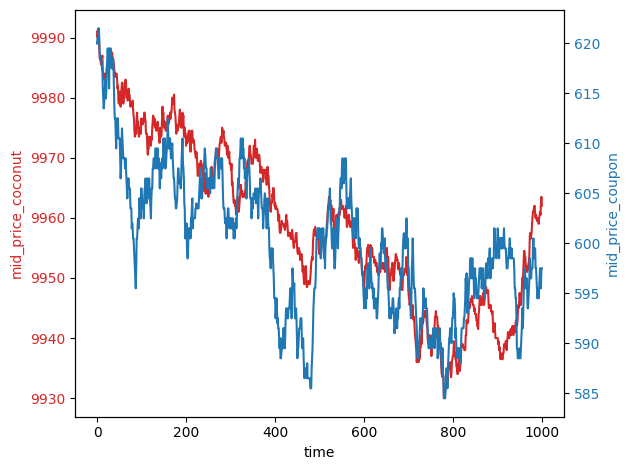

In [23]:
#plot data_coconut['mid_price'] and data_coupon['mid_price'] on the same graph with 2 different y axis
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('mid_price_coconut', color=color)
ax1.plot(test_coconut['mid_price'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('mid_price_coupon', color=color)  # we already handled the x-label with ax1
ax2.plot(test_coupon['mid_price'], color=color)
ax2.tick_params(axis='y', labelcolor=color)


fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [24]:
#calculate the spread
spread_test = test_coconut['mid_price'] - test_coupon['mid_price']
#standardize spread_test
spread_test_standardized = (spread_test - spread_test.mean()) / spread_test.std()

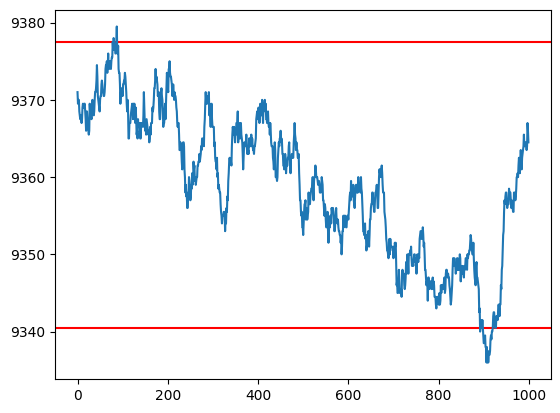

In [48]:


plt.axhline(y= (spread_test.mean() + 2*spread_test.std()), color='r', linestyle='-')
plt.axhline(y= (spread_test.mean() - 2*spread_test.std()), color='r', linestyle='-')
spread_test.plot()
plt.show()

In [36]:
spread_test.mean()

9358.9665

In [37]:
spread_test.std()

9.275136435972566

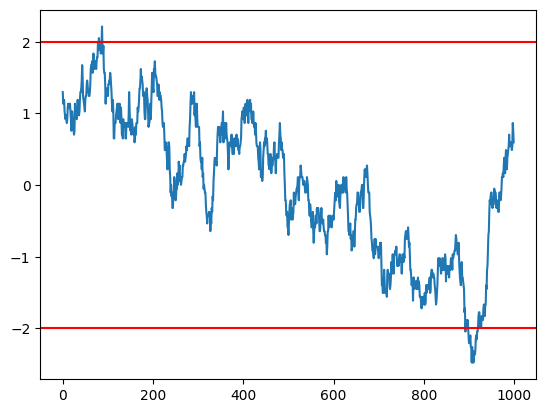

In [35]:
spread_test_standardized.plot()
#add horizontal lines at +-1.5
plt.axhline(y=2, color='r', linestyle='-')
plt.axhline(y=-2, color='r', linestyle='-')

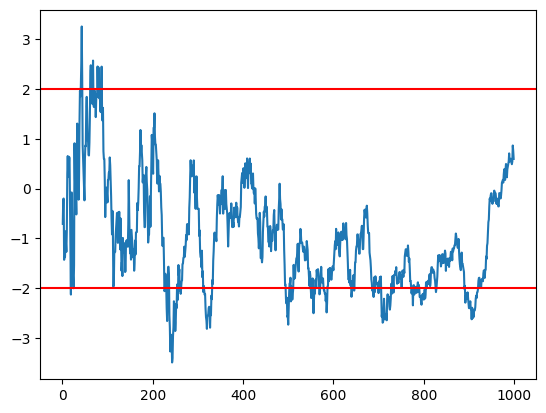

In [29]:
#TODO: CHECK HOW THE THRESHOLDS VARY USING AN EXPANDING WINDOW TO CALCULATE THE MEAN AND STD OF THE SPREAD
#calculate the average and std of the spread using an expanding window
spread_test_expanding_mean = spread_test.expanding().mean()
spread_test_expanding_std = spread_test.expanding().std()

#at each timestamp, calculate the z score of the spread
spread_test_z_score = (spread_test - spread_test_expanding_mean) / spread_test_expanding_std
spread_test_z_score.plot()
#add horizontal lines at +-1.5
plt.axhline(y=2, color='r', linestyle='-')
plt.axhline(y=-2, color='r', linestyle='-')


In [33]:
#get all the indexes where spread_test_z_score is > 2
spread_test_z_score_above_2 = spread_test_z_score[spread_test_z_score > 2].index
spread_test_z_score_above_2



Index([41, 42, 43, 44, 62, 63, 64, 65, 67, 68, 78, 79, 80, 81, 87], dtype='int64')

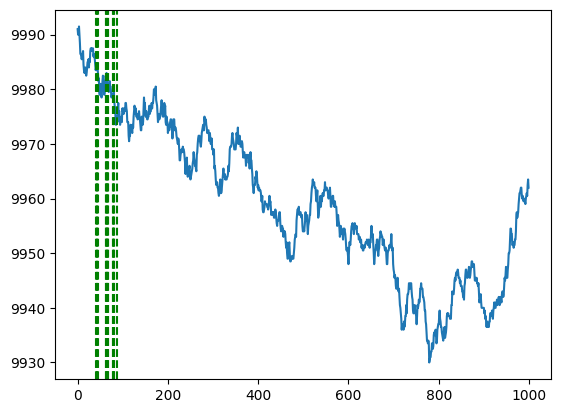

In [34]:
test_coconut['mid_price'].plot()

#plot vertical lines at the indexes in spread_test_z_score_above_2
for i in spread_test_z_score_above_2:
    plt.axvline(x=i, color='green', linestyle='--')

    